In [229]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


In [230]:
df = pd.read_csv('dataset/Crop_recommendation.csv')
df

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,Unnamed: 8,Unnamed: 9
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,NaN,NaN
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,NaN,NaN
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,NaN,NaN
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,NaN,NaN
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,NaN,NaN
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,NaN,NaN
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,NaN,NaN
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,NaN,NaN


In [231]:
df.shape

(2200, 10)

In [232]:
df.isnull().sum()

Nitrogen          0
phosphorus        0
potassium         0
temperature       0
humidity          0
ph                0
rainfall          0
label             0
Unnamed: 8     2200
Unnamed: 9     2200
dtype: int64

In [233]:
df = df.drop(['Unnamed: 8','Unnamed: 9' ], axis='columns')
df

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [234]:
df['crop'] = df['label']
df=df.drop('label', axis=1)
df


,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


Finding unique values

In [235]:
for column in df.columns:
    unique = df[column].unique()
    print(f"Unique values in column '{column}': {unique}")
    print()

Unique values in column 'Nitrogen': [ 90  85  60  74  78  69  94  89  68  91  93  77  88  76  67  83  98  66
  97  84  73  92  95  99  63  62  64  82  79  65  75  71  72  70  86  61
  81  80 100  87  96  40  23  39  22  36  32  58  59  42  28  43  27  50
  25  31  26  54  57  49  46  38  35  52  44  24  29  20  56  37  51  41
  34  30  33  47  53  45  48  13   2  17  12   6  10  19  11  18  21  16
   9   1   7   8   0   3   4   5  14  15  55 105 108 118 101 106 109 117
 114 110 112 111 102 116 119 107 104 103 120 113 115 133 136 126 121 129
 122 140 131 135 123 125 139 132 127 130 134]

Unique values in column 'phosphorus': [ 42  58  55  35  37  53  54  46  56  50  48  38  45  40  59  41  47  49
  51  57  39  43  44  60  52  36  72  67  73  70  62  74  66  63  71  78
  80  68  65  77  76  79  61  64  69  75  24  18  26  27  25  21  30  11
   5  10   7  20  22  15  23   8  16  29  17   6  19  13   9  14  28  94
  95  92  89  88  87  85  86  83  91  81  84  90  82  93  33  31  34  32
 13

In [236]:
# cheking tempreture is in correct format

In [237]:
isvalid = True

if np.isnan(df['temperature']).any() or np.isinf(df['temperature']).any():
    print("Dataset contains NaN or Inf values. Please handle them.")
    isvalid=False

# Check for non-numeric values
if not np.issubdtype(df['temperature'].dtype, np.number):
    print("Dataset contains non-numeric values. Please ensure all data are numbers.")
    isvalid=False

# Check for correct format
# For example, if you expect all data to be in float format, you can check that
if df['temperature'].dtype != np.float64:
    print("Dataset format is incorrect. Please ensure all data are in the correct format.")
    isvalid=False

if isvalid:
    print('Tempreture all fomart corret')

Tempreture all fomart corret


In [238]:
df.describe()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [239]:
df.crop.value_counts()

crop
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

Outlier handdling

In [240]:
from matplotlib import pyplot as plt
import seaborn as sns

In [241]:
# Nitrogen

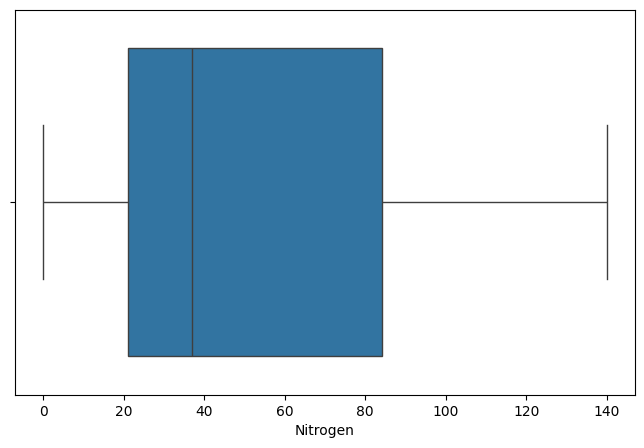

In [242]:
plt.figure(figsize = (8,5))
sns.boxplot(x = df['Nitrogen'])
plt.show()

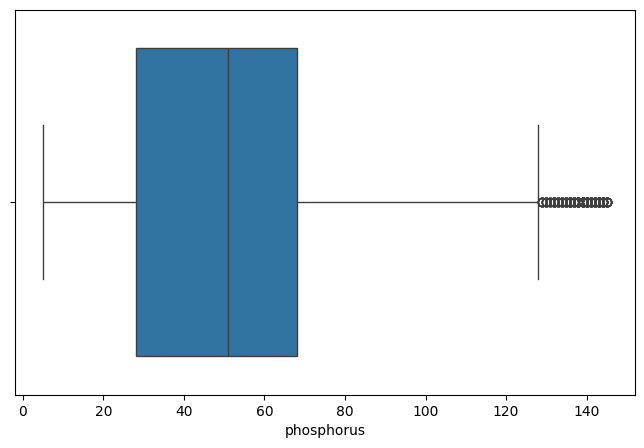

In [243]:
plt.figure(figsize = (8,5))
sns.boxplot(x = df['phosphorus'])
plt.show()

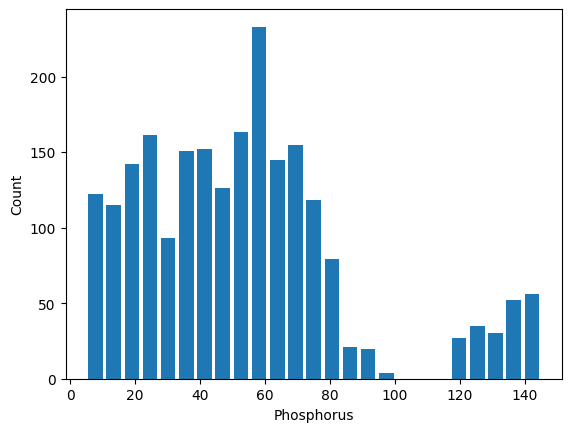

In [244]:
plt.hist(df['phosphorus'], bins=25, rwidth=0.8)
plt.xlabel('Phosphorus')
plt.ylabel('Count')
plt.show()

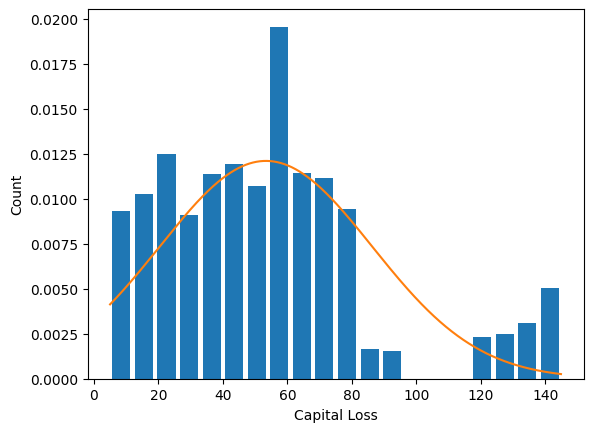

In [245]:
from scipy.stats import norm
import numpy as np

plt.hist(df['phosphorus'], bins=20, rwidth=0.8, density=True)
plt.xlabel('Capital Loss')
plt.ylabel('Count')

rng = np.arange(df['phosphorus'].min(), df['phosphorus'].max(), 0.1)
plt.plot(rng, norm.pdf(rng, df['phosphorus'].mean(), df['phosphorus'].std()))


In [246]:
df

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


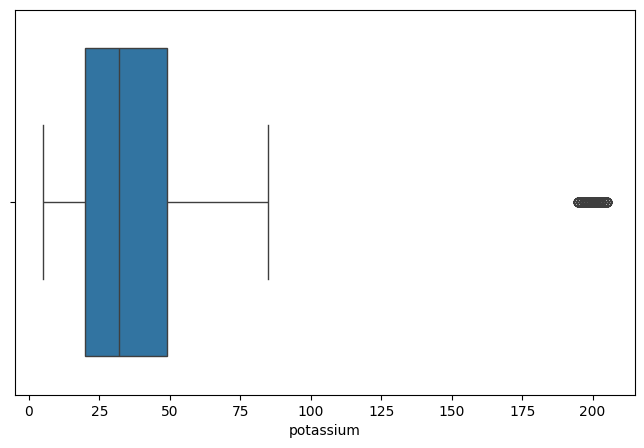

In [247]:
plt.figure(figsize = (8,5))
sns.boxplot(x = df['potassium'])
plt.show()

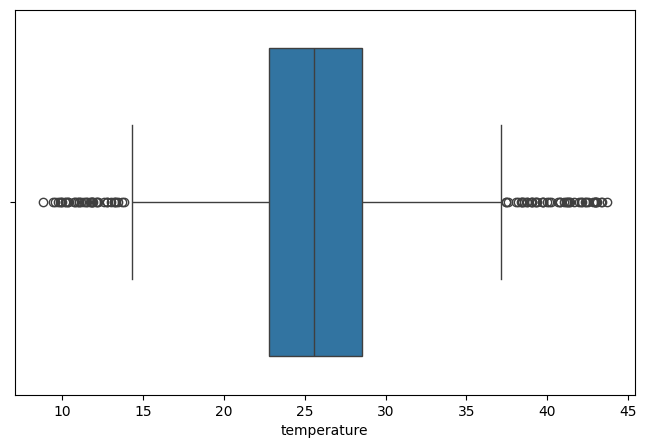

In [248]:
plt.figure(figsize = (8,5))
sns.boxplot(x = df['temperature'])
plt.show()

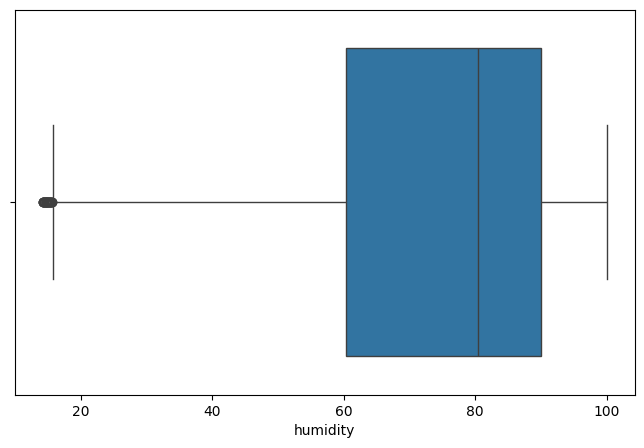

In [249]:
plt.figure(figsize = (8,5))
sns.boxplot(x = df['humidity'])
plt.show()

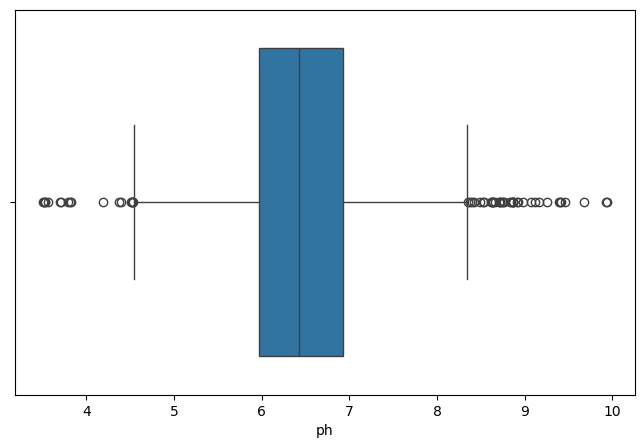

In [250]:
plt.figure(figsize = (8,5))
sns.boxplot(x = df['ph'])
plt.show()

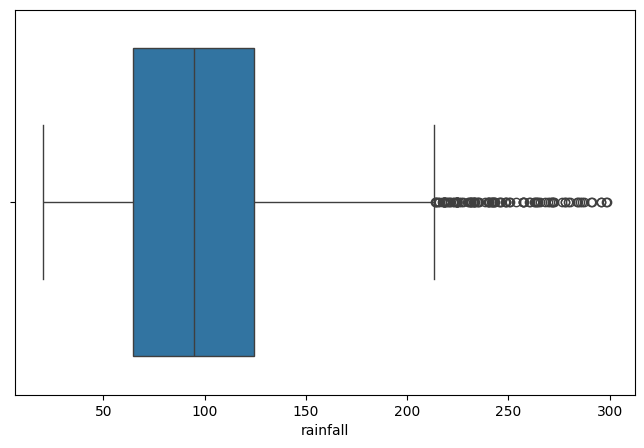

In [251]:
plt.figure(figsize = (8,5))
sns.boxplot(x = df['rainfall'])
plt.show()

Encoding the data

In [252]:
df.dtypes

Nitrogen         int64
phosphorus       int64
potassium        int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
crop            object
dtype: object

In [253]:
crop_list = []
unique_values = df['crop'].unique() 
crop_list.append(unique_values)
print(crop_list)


[array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)]


In [254]:
from sklearn.preprocessing import LabelEncoder

In [255]:
label = LabelEncoder()

In [256]:
# Fit and transform the 'crop' column
df['crop'] = label.fit_transform(df['crop'])




In [257]:
# Store the mapping of encoded labels to original string values
encoded_mapping = dict(zip(label.transform(label.classes_), label.classes_))
list=[]
# Iterate over the encoded values and print the corresponding original string values
for encoded_value in df['crop']:
    if encoded_value in list:
      continue
    else:    
      original_value = encoded_mapping[encoded_value]
      print(f"{encoded_value},'{original_value}'")
      list.append(encoded_value)

20,'rice'
11,'maize'
3,'chickpea'
9,'kidneybeans'
18,'pigeonpeas'
13,'mothbeans'
14,'mungbean'
2,'blackgram'
10,'lentil'
19,'pomegranate'
1,'banana'
12,'mango'
7,'grapes'
21,'watermelon'
15,'muskmelon'
0,'apple'
16,'orange'
17,'papaya'
4,'coconut'
6,'cotton'
8,'jute'
5,'coffee'


In [258]:
df

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


In [259]:
x = df.drop('crop',axis=1)
y = df['crop']

In [260]:
x

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [261]:
y

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: crop, Length: 2200, dtype: int32

In [262]:
df

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


Corelation  Metrix

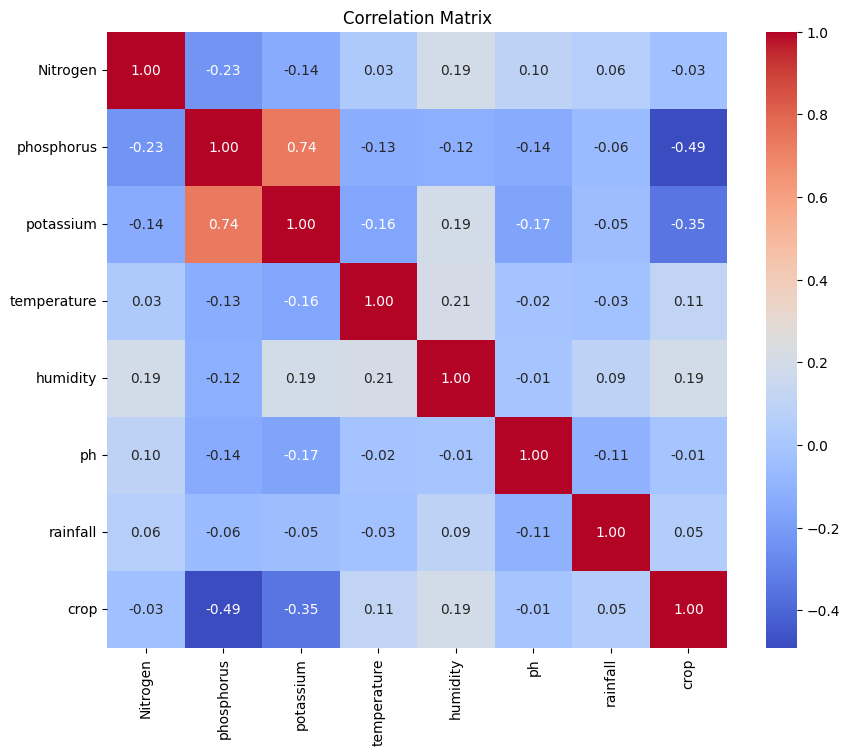

In [263]:
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [264]:
# Compute the correlation report
corr_report = df.corr()
corr_report


,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,crop
Nitrogen,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020,-0.031130
phosphorus,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839,-0.491006
potassium,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461,-0.346417
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084,0.113606
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423,0.193911
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069,-0.012253
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000,0.045611
crop,-0.031130,-0.491006,-0.346417,0.113606,0.193911,-0.012253,0.045611,1.000000


Train the model

In [265]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [266]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [267]:
len(X_train),len(X_test)

(1760, 440)

In [268]:
len(y_train),len(y_test)

(1760, 440)

In [269]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
lr.score(X_train,y_train), lr.score(X_test,y_test)

(0.9818181818181818, 0.9522727272727273)

Decision Tree

In [270]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [271]:
dtf = DecisionTreeClassifier()

In [272]:
dtf.fit(X_train,y_train)

DecisionTreeClassifier()

In [273]:
dtf.score(X_train,y_train)

1.0

In [274]:
dtf.score(X_test,y_test)

0.9863636363636363

In [275]:
dtf_pred  = dtf.predict(X_test)

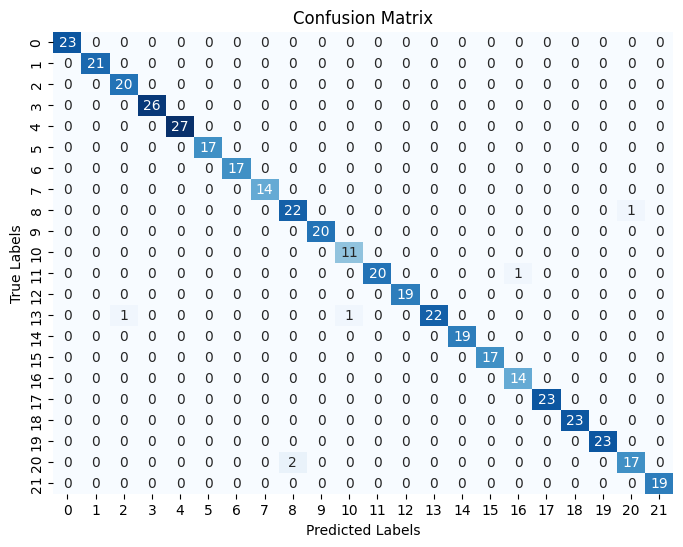

In [276]:


# Assuming y_test and y_pred are your true labels and predicted labels, respectively
# If you're using scikit-learn, you can obtain these values directly from your model

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, dtf_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Random Forest

In [277]:
from sklearn.ensemble import RandomForestClassifier

In [278]:
rf = RandomForestClassifier()

In [279]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [280]:
rf.score(X_train,y_train)

1.0

In [281]:
rf.score(X_test,y_test)

0.9931818181818182

In [282]:
rf_pred  = rf.predict(X_test)

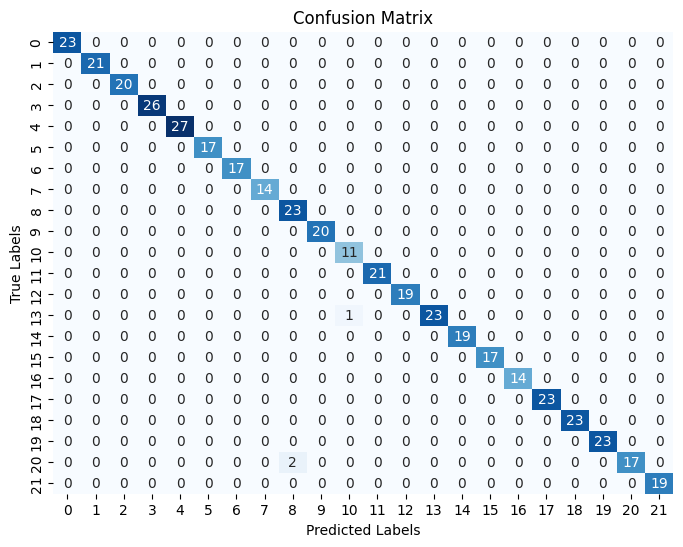

In [283]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, rf_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Gradient Boosting (XGBoost)

In [284]:
from xgboost import XGBClassifier


In [285]:
# Initialize the XGBoost classifier
xgb = XGBClassifier()

# Train the classifier on the training data
xgb.fit(X_train, y_train)

# Make predictions
xgb_pred = xgb.predict(X_test)

In [286]:
xgb.score(X_train,y_train)

1.0

In [287]:
xgb.score(X_test,y_test)

0.9863636363636363

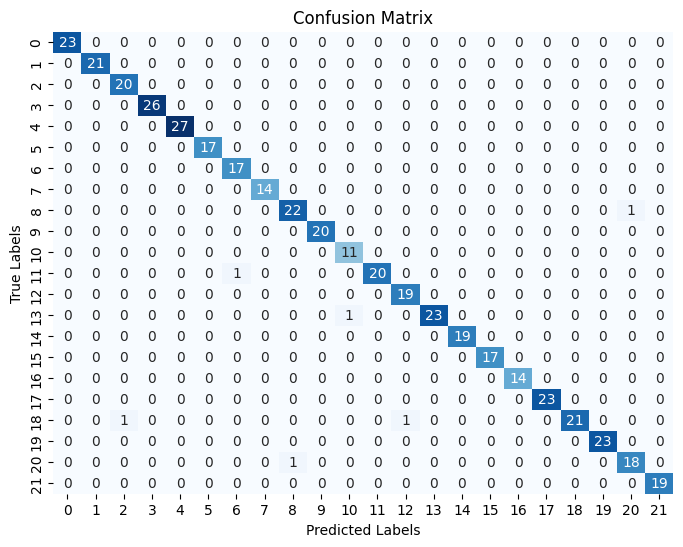

In [288]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, xgb_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Neural Networks (using TensorFlow/Keras)

In [289]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [290]:
# Calculate the number of unique classes in the target variable
num_classes = len(set(y_train))

# Initialize the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on the training data
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


# Make predictions
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)



Epoch 1/100
44/44 [==============================] - 1s 4ms/step - loss: 7.2570 - accuracy: 0.1918 - val_loss: 2.6312 - val_accuracy: 0.3665
Epoch 2/100
44/44 [==============================] - 0s 1ms/step - loss: 1.4830 - accuracy: 0.5469 - val_loss: 0.8933 - val_accuracy: 0.7557
Epoch 3/100
44/44 [==============================] - 0s 2ms/step - loss: 0.7488 - accuracy: 0.7756 - val_loss: 0.5832 - val_accuracy: 0.8438
Epoch 4/100
44/44 [==============================] - 0s 2ms/step - loss: 0.5361 - accuracy: 0.8317 - val_loss: 0.4613 - val_accuracy: 0.8608
Epoch 5/100
44/44 [==============================] - 0s 2ms/step - loss: 0.4132 - accuracy: 0.8864 - val_loss: 0.3199 - val_accuracy: 0.9148
Epoch 6/100
44/44 [==============================] - 0s 2ms/step - loss: 0.3159 - accuracy: 0.9041 - val_loss: 0.2856 - val_accuracy: 0.9205
Epoch 7/100
44/44 [==============================] - 0s 2ms/step - loss: 0.2594 - accuracy: 0.9318 - val_loss: 0.2418 - val_accuracy: 0.9290
Epoch 8/100
4

In [291]:
# Evaluate the model on the training data
train_loss, train_accuracy = model.evaluate(X_train, y_train)

print("Training Accuracy:", train_accuracy)


55/55 [==============================] - 0s 909us/step - loss: 0.0499 - accuracy: 0.9773
Training Accuracy: 0.9772727489471436


In [292]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.95


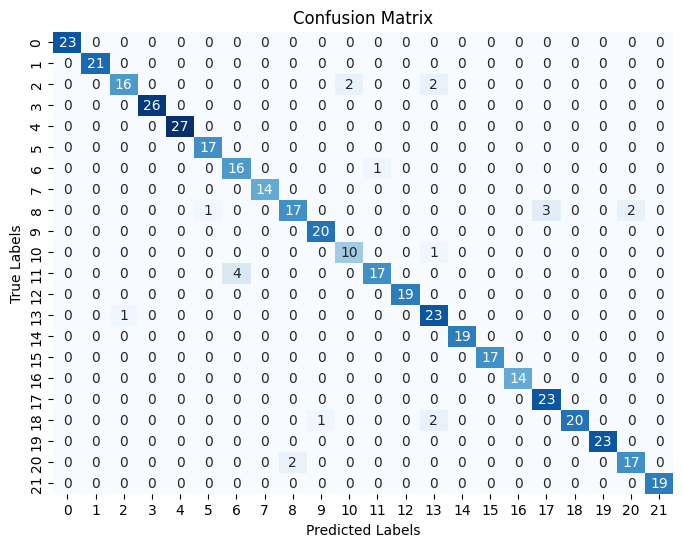

In [293]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


SVM

In [294]:
from sklearn.svm import SVC

# Initialize the SVM classifier
svm = SVC()


In [295]:
# Train the classifier on the training data
svm.fit(X_train, y_train)

# Make predictions
svm_pred = svm.predict(X_test)

In [296]:
svm.score(X_train,y_train)

0.98125

In [297]:
svm.score(X_test,y_test)

0.9613636363636363

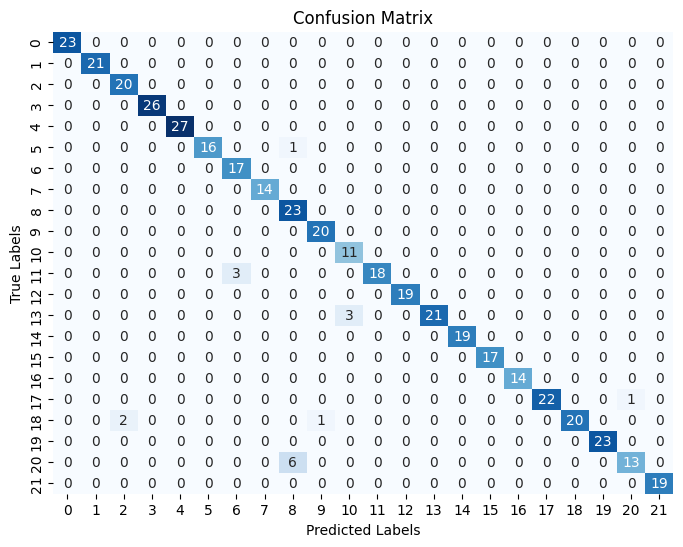

In [298]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, svm_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


K-Nearest Neighbors (KNN)

In [299]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn = KNeighborsClassifier()


In [300]:
# Train the classifier on the training data
knn.fit(X_train, y_train)

# Make predictions
knn_pred = knn.predict(X_test)

In [301]:
knn.score(X_train,y_train)


0.9897727272727272

In [302]:
knn.score(X_test,y_test)

0.9704545454545455

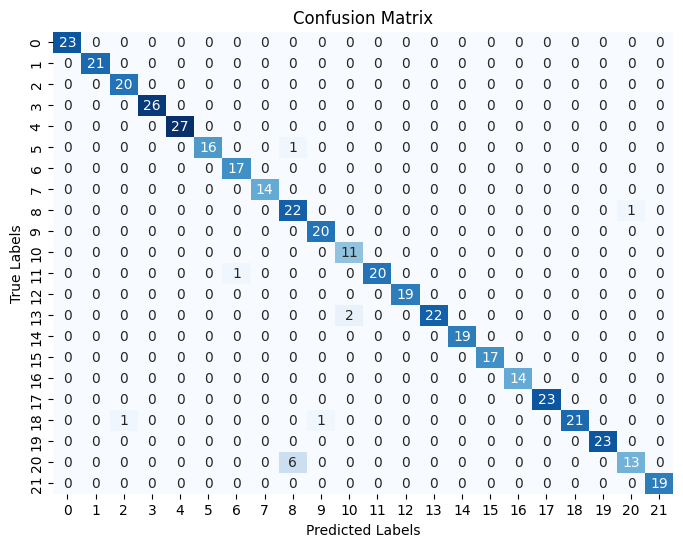

In [303]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, knn_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Ensemble Methods (AdaBoost):

In [304]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoost classifier
adaboostr = AdaBoostClassifier()


In [305]:
# Train the classifier on the training data
adaboostr.fit(X_train, y_train)

# Make predictions
adaboostr_pred = adaboostr.predict(X_test)

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [306]:
adaboostr.score(X_train,y_train)

0.14659090909090908

In [307]:
adaboostr.score(X_test,y_test)

0.09545454545454546

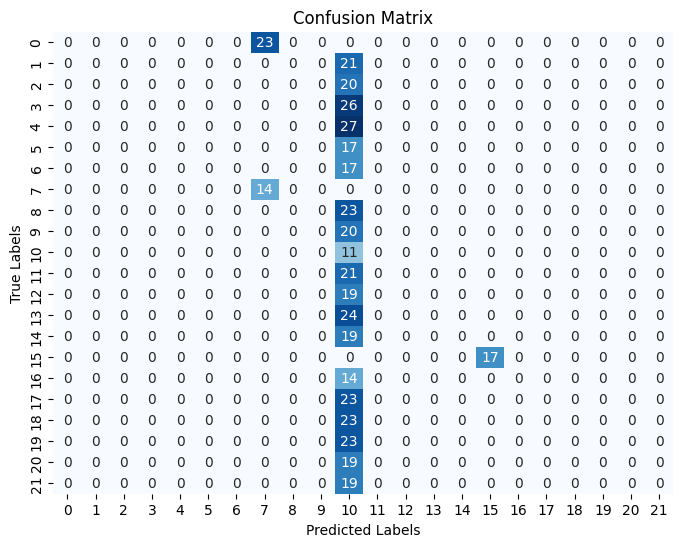

In [308]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, adaboostr_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Techniqeus to reduce the overfiting the random forest model

Cross validations

In [309]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())


Cross-validation scores: [0.98579545 1.         0.99431818 0.99715909 1.        ]
Mean CV score: 0.9954545454545454


Ensemble Methods (e.g., Bagging)

In [310]:
from sklearn.ensemble import BaggingClassifier

# Initialize the Bagging Classifier with Random Forest as the base estimator
base_rf_classifier = RandomForestClassifier()
bagging_classifier = BaggingClassifier(base_rf_classifier, n_estimators=10)

# Train the Bagging classifier
bagging_classifier.fit(X_train, y_train)


BaggingClassifier(estimator=RandomForestClassifier())

In [311]:
bagging_classifier.score(X_train,y_train), bagging_classifier.score(X_test,y_test)

(0.9994318181818181, 0.9931818181818182)

Hyper Parameter tuning

In [312]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5)

# Perform grid search
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)


Best hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [313]:
grid_search.score(X_train,y_train)

1.0

In [314]:
grid_search.score(X_test,y_test)

0.9931818181818182

In [315]:
# Get the best hyperparameters from grid search
best_params = grid_search.best_params_

# Create a new RandomForestClassifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)

# Train the classifier on the entire training dataset
best_rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [316]:
best_rf_classifier.score(X_train,y_train)

1.0

In [317]:
best_rf_classifier.score(X_test,y_test)

0.9931818181818182

Clasification Report

In [318]:
from sklearn.metrics import classification_report

In [319]:
print("Decision Tree Classifier:")
print(classification_report(y_test, dtf_pred))



Decision Tree Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      0.96      0.94        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       0.93      1.00      0.97        14
 

In [320]:
print("Random Forest Classifier:")
print(classification_report(y_test, rf_pred))



Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
 

In [321]:
print("Support Vector Machine (SVM) Classifier:")
print(classification_report(y_test, svm_pred))



Support Vector Machine (SVM) Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.91      1.00      0.95        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      0.94      0.97        17
           6       0.85      1.00      0.92        17
           7       1.00      1.00      1.00        14
           8       0.77      1.00      0.87        23
           9       0.95      1.00      0.98        20
          10       0.79      1.00      0.88        11
          11       1.00      0.86      0.92        21
          12       1.00      1.00      1.00        19
          13       1.00      0.88      0.93        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1

In [322]:
print("Logistic Regression Classifier:")
print(classification_report(y_test, lr_pred))

Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.85      0.85      0.85        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       0.80      0.94      0.86        17
           7       1.00      1.00      1.00        14
           8       0.87      0.87      0.87        23
           9       1.00      1.00      1.00        20
          10       0.77      0.91      0.83        11
          11       0.94      0.81      0.87        21
          12       1.00      1.00      1.00        19
          13       0.91      0.88      0.89        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00      

In [323]:
import joblib 
file_name = 'crop_app'
joblib.dump(lr,'crop_app')
['crop_app']



['crop_app']

In [353]:
app = joblib.load('crop_app')
arr = [[80,12,43,20.879744,72.002744,6.502985,72.935536]]

In [354]:
# Predict the class
predicted_class_index = app.predict(arr)

# Define the class names dictionary
class_names = {
    20: 'Rice', 11: 'Maize', 3: 'Chickpea', 9: 'Kidneybeans', 18: 'Pigeonpeas',
    13: 'Mothbeans', 14: 'Mungbean', 2: 'Blackgram', 10: 'Lentil', 19: 'Pomegranate',
    1: 'Banana', 12: 'Mango', 7: 'Grapes', 21: 'Watermelon', 15: 'Muskmelon',
    0: 'Apple', 16: 'Orange', 17: 'Papaya', 4: 'Coconut', 6: 'Cotton', 8: 'Jute',
    5: 'Coffee'
}

# Map the predicted class index to the class name
predicted_class = class_names[predicted_class_index[0]]

print("Predicted Class:", predicted_class)

Predicted Class: Watermelon


In [356]:
import numpy as np

# Reshape the input data array to match the shape expected by the model
arr = np.array(arr)  # Convert to numpy array if it's not already
X_new = np.reshape(arr, (arr.shape[0], -1))  # Reshape to match input shape

# Make predictions
y_pred_proba = model.predict(X_new)
y_pred = np.argmax(y_pred_proba, axis=1)


# Define the class names dictionary
class_names = {
    20: 'Rice', 11: 'Maize', 3: 'Chickpea', 9: 'Kidneybeans', 18: 'Pigeonpeas',
    13: 'Mothbeans', 14: 'Mungbean', 2: 'Blackgram', 10: 'Lentil', 19: 'Pomegranate',
    1: 'Banana', 12: 'Mango', 7: 'Grapes', 21: 'Watermelon', 15: 'Muskmelon',
    0: 'Apple', 16: 'Orange', 17: 'Papaya', 4: 'Coconut', 6: 'Cotton', 8: 'Jute',
    5: 'Coffee'
}

# Map the predicted class index to the class name
predicted_class = class_names[y_pred[0]]

print("Predicted Class:", predicted_class)

1/1 [==============================] - 0s 15ms/step
Predicted Class: Watermelon


In [357]:
import joblib 
file_name = 'crop_app2'
joblib.dump(model,'crop_app2')
['crop_app2']



['crop_app2']